<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/correleation_coefficient_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau

In [ ]:
x = np.linspace(-2,2,100)
err = np.zeros(x.shape[0])
import random
for i in range(x.shape[0]):
    err[i] = (random.uniform(-.5,0.5))

In [ ]:
err

array([-2.07266923e-01, -4.39058386e-01,  1.39613259e-01, -1.06520381e-02,
        2.20923007e-01,  5.70918963e-04,  4.82612179e-01, -4.50130067e-01,
       -4.99337092e-01, -2.13002539e-01,  4.88035873e-01, -4.54897668e-01,
       -1.11545006e-01, -1.43554627e-01,  2.74831260e-02, -3.60257512e-01,
       -4.49532001e-01, -1.04714591e-01,  2.10331588e-01,  2.50407247e-02,
        2.15273606e-01, -1.54784535e-02, -4.08894513e-01, -3.85709937e-01,
       -2.98226202e-01, -2.65675848e-01,  2.45390081e-01, -4.91781710e-02,
       -2.92550578e-01, -2.20122025e-01, -3.69312197e-01, -1.84940545e-04,
        1.84659061e-02,  2.83493134e-01, -3.52557074e-01,  4.02613991e-01,
        3.28249108e-01,  1.19892399e-01, -4.65394268e-01,  4.91740818e-01,
        4.09854821e-01,  2.64955969e-01,  3.17966090e-01, -4.48891682e-01,
        4.92617292e-01, -4.89449171e-01,  5.53938422e-02,  4.60009709e-01,
       -6.64489867e-02,  3.00820166e-01, -2.94123806e-02,  4.36943623e-01,
        1.42259973e-01, -

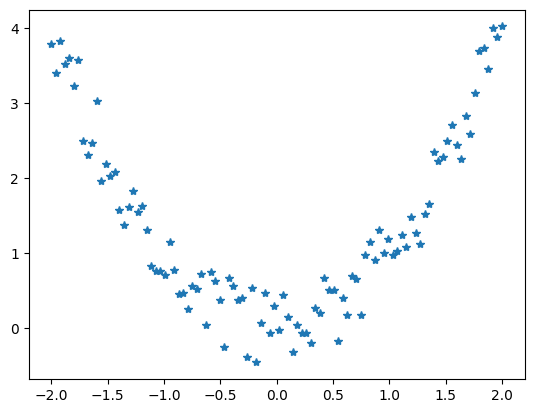

In [ ]:
y = x**2+err
plt.plot(x,y,'*')

In [ ]:
spearmanr(x,y)

SignificanceResult(statistic=np.float64(0.03959195919591958), pvalue=np.float64(0.6957267893527537))

In [ ]:
kendalltau(x,y)

SignificanceResult(statistic=np.float64(0.02343434343434344), pvalue=np.float64(0.7297474136171769))

In [ ]:
pearsonr(x,y)

PearsonRResult(statistic=np.float64(0.0429002249729251), pvalue=np.float64(0.6717088833674326))

In [ ]:
spearmanr(x[50:],y[50:])

SignificanceResult(statistic=np.float64(0.9591836734693876), pvalue=np.float64(5.574702269618794e-28))

In [ ]:
pearsonr(x[50:],y[50:])

PearsonRResult(statistic=np.float64(0.9440707955303053), pvalue=np.float64(9.02436794332422e-25))

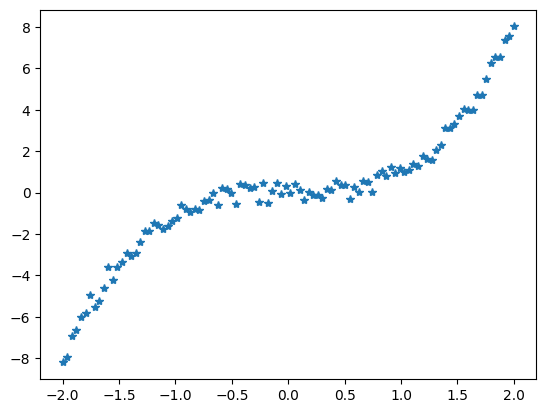

In [ ]:
y = x**3+err
plt.plot(x,y,'*')

In [ ]:
pearsonr(x,y),spearmanr(x,y),kendalltau(x,y)

(PearsonRResult(statistic=np.float64(0.9155193820375858), pvalue=np.float64(1.5341048564616914e-40)),
 SignificanceResult(statistic=np.float64(0.9620402040204019), pvalue=np.float64(4.479545415455064e-57)),
 SignificanceResult(statistic=np.float64(0.8735353535353537), pvalue=np.float64(6.035200007223198e-38)))

In [ ]:
import statsmodels.tsa.api as smt
import pandas as pd
#loading Data
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv",index_col="Date")
data.index = pd.to_datetime(data.index)
print(data.shape)
data.head()


(3650, 1)


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<Axes: xlabel='Date'>

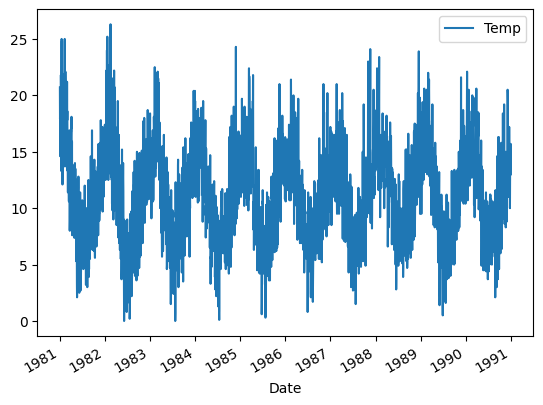

In [ ]:
data.plot()

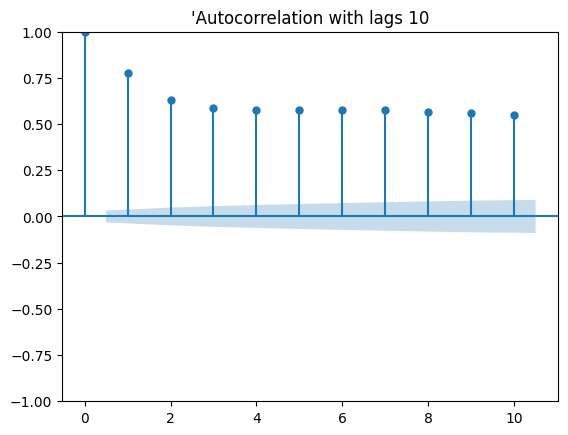

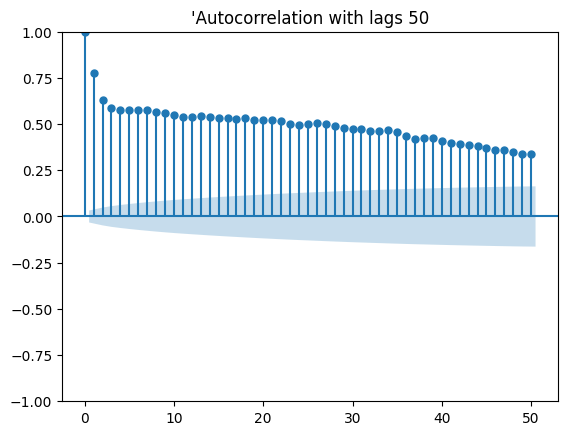

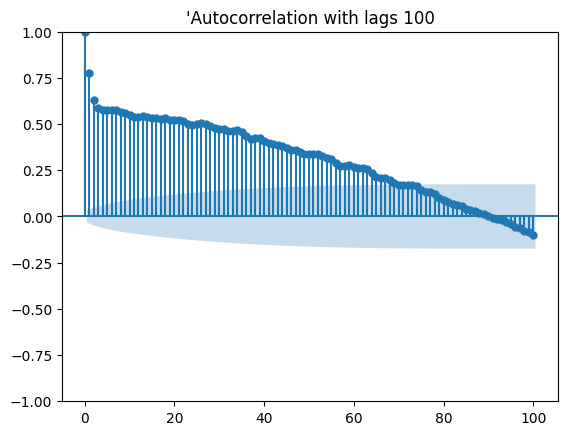

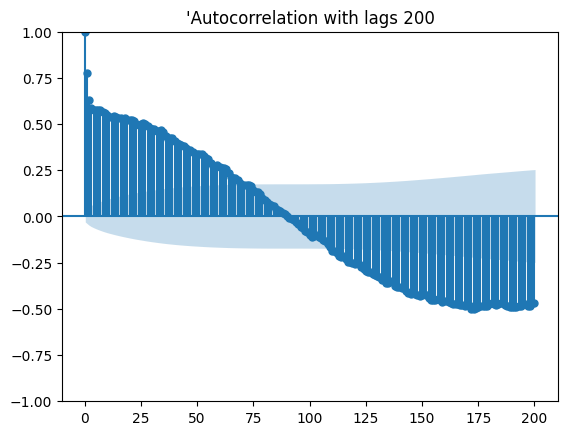

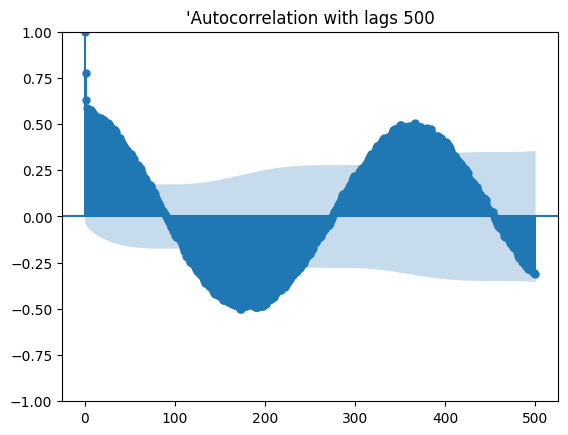

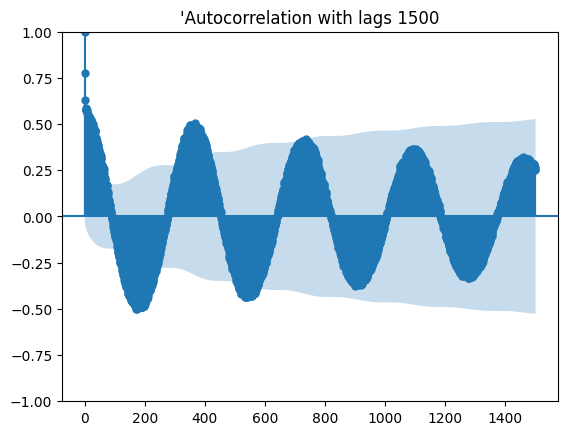

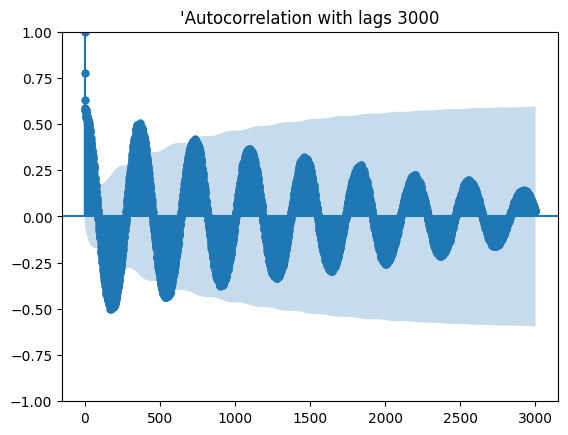

In [ ]:
lags = [10,50,100,200,500,1500,3000]
for l in lags:
    titles = "'Autocorrelation with lags "+ str(l)
    smt.graphics.plot_acf(data,lags=l,alpha=0.05,title=titles)


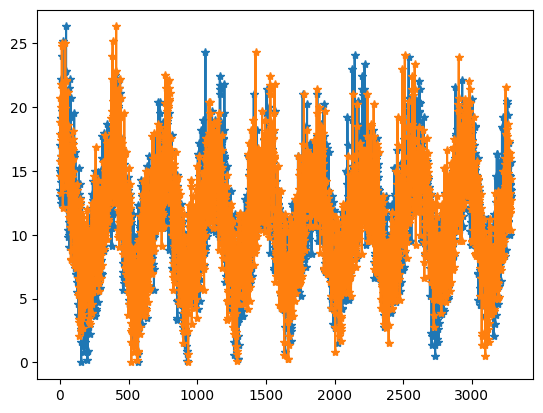

In [ ]:
plt.plot(np.copy(data[365:]),'-*')
plt.plot(np.copy(data[:-365]),'-*')

In [ ]:
pearsonr(np.copy(data[365:]),np.copy(data[:-365]))

PearsonRResult(statistic=array([0.53348527]), pvalue=array([4.48630948e-241]))

In [ ]:
pearsonr(np.copy(data[275:]),np.copy(data[:-275]))

PearsonRResult(statistic=array([-0.00684381]), pvalue=array([0.69103815]))

(0.0, 720.0)

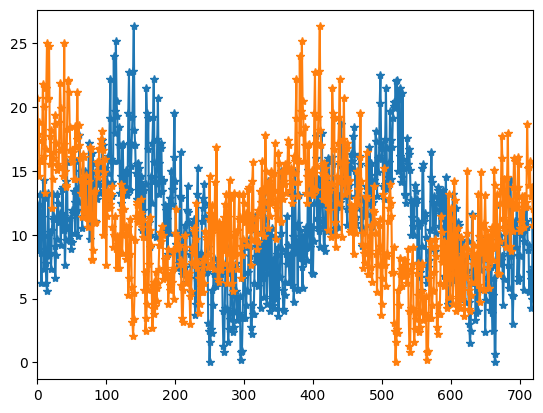

In [ ]:
plt.plot(np.copy(data[270:]),'-*')
plt.plot(np.copy(data[:-270]),'-*')
plt.xlim(0,720)

In [33]:
from numpy import fft

<ipython-input-87-eb8fe026ad3b>:4: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


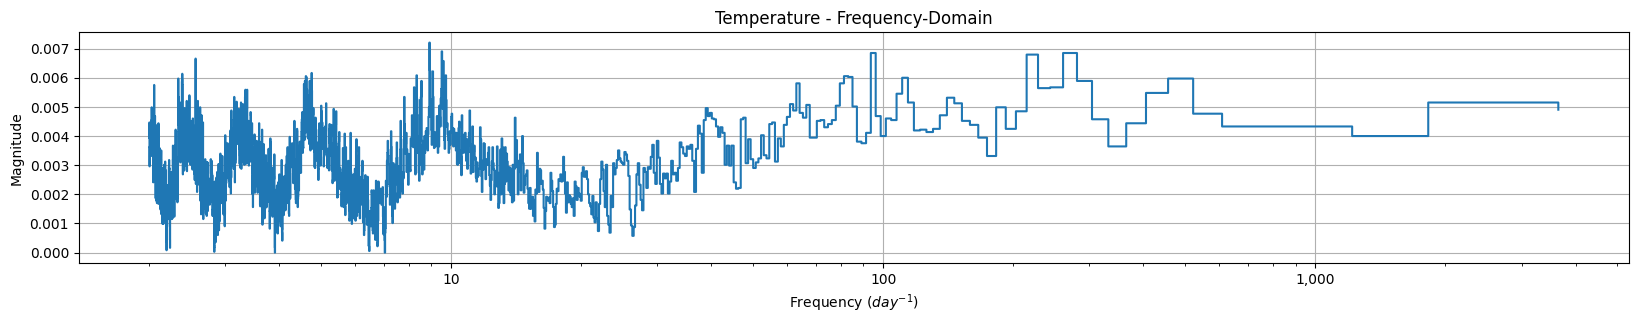

In [ ]:
X = fft.fft(data)
N = len(X)
frequencies = fft.fftfreq(N, 1)
periods = 1 / frequencies
fft_magnitude = np.abs(X) / N

mask = frequencies >= 0

# Plot the Fourier Transform
fig, ax = plt.subplots(figsize=(20, 3))
ax.step(periods[mask], fft_magnitude[mask]) # Only plot positive frequencies
ax.set_xscale('log')
ax.xaxis.set_major_formatter('{x:,.0f}')
ax.set_title('Temperature - Frequency-Domain')
ax.set_xlabel(r'Frequency $(day^{-1})$')
ax.set_ylabel('Magnitude')
plt.grid()
#plt.xlim(1,100)
plt.show()

<ipython-input-86-1a4af99cec70>:4: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,10)


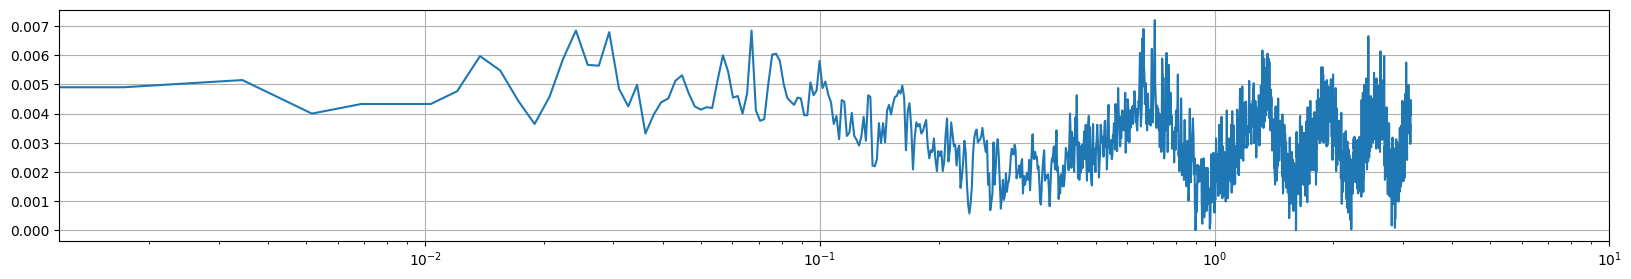

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot(2*np.pi/periods[mask], fft_magnitude[mask])
ax.set_xscale('log')
plt.xlim(0,10)
plt.grid()


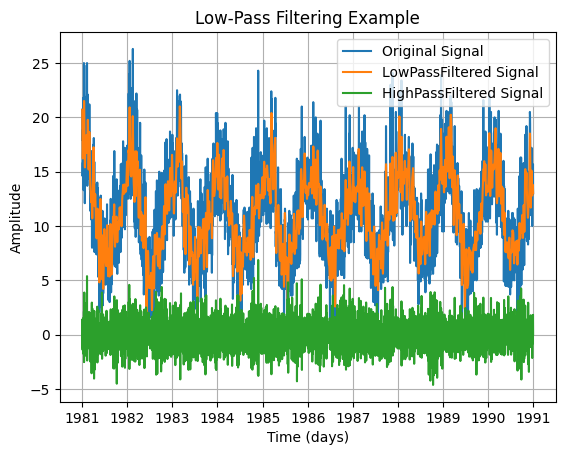

In [ ]:
from scipy.signal import butter, filtfilt
# Filter parameters
cutoff_freq = 100  # Cutoff frequency in Hz
fs = 1000  # Sampling rate in Hz
order = 4  # Filter order
# Design the low-pass filter
nyq = 0.5 * fs
normal_cutoff = cutoff_freq / nyq
b, a = butter(order, normal_cutoff, btype='lowpass')
# Apply the filter
filtered_data = filtfilt(b, a, data['Temp'])
data['LowPassFiltered'] = filtered_data

# Filter parameters
cutoff_freq = 200  # Cutoff frequency in Hz
fs = 1000  # Sampling rate in Hz
order = 4  # Filter order
# Design the high-pass filter (change btype to 'highpass')
nyq = 0.5 * fs
normal_cutoff = cutoff_freq / nyq
b, a = butter(order, normal_cutoff, btype='highpass')  # <-- modify here
# Apply the filter
filtered_data = filtfilt(b, a, data['Temp'])
data['HighPassFiltered'] = filtered_data

plt.plot(data['Temp'], label='Original Signal')
plt.plot(data['LowPassFiltered'], label='LowPassFiltered Signal')
plt.plot(data['HighPassFiltered'], label='HighPassFiltered Signal')

plt.xlabel('Time (days)')
plt.ylabel('Amplitude')
plt.title('Low-Pass Filtering Example')
plt.legend()
plt.grid(True)

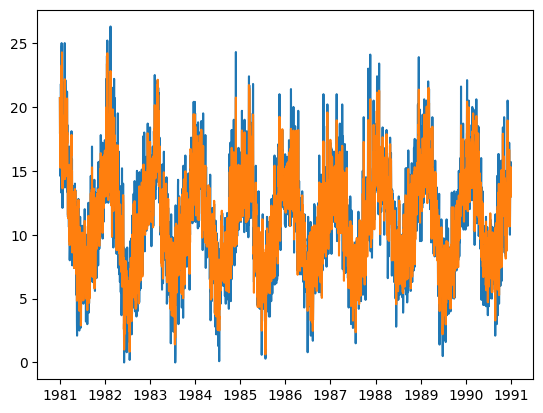

In [ ]:
plt.plot(data['Temp'], label='Original Signal')
plt.plot(data['LowPassFiltered']+data['HighPassFiltered'], label='PassFiltered Signal')


(0.0, 18250.0)

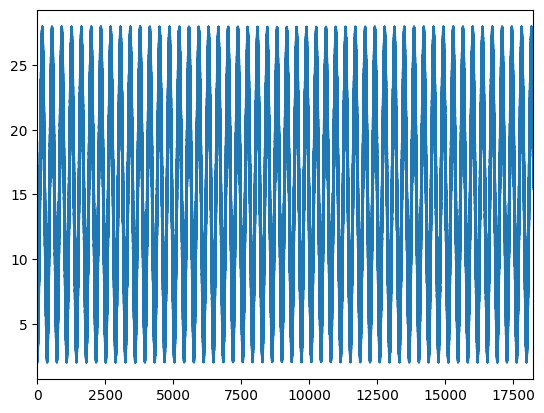

In [52]:
dt = 3600 #60 #seconds (i.e. 1 minute)
T1 = 12*3600/dt # 12 hours 1st frequency diurnal cycle
T2 = 180*24*3600/dt # 180 days 2nd frequency diurnal cycle
n_years = 50
time = np.linspace(0,n_years*365*24*3600/dt,np.int64(n_years*365*24*3600/dt))
Temp = 15 + 3*np.sin(np.pi*(time-6*3600/dt)/T1)+10*np.sin(np.pi*(time-90*24*3600/dt)/T2)
plt.plot(time/24*3600/dt,Temp)
plt.xlim(0,365*n_years)

<ipython-input-53-9a57a8ba8c89>:4: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


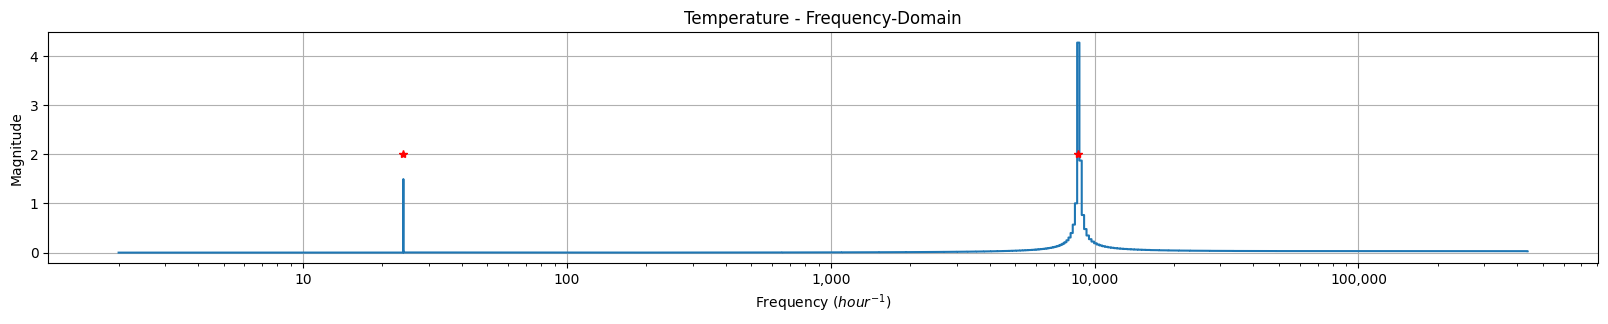

In [53]:
X = fft.fft(Temp)
N = len(X)
frequencies = fft.fftfreq(N, 1)
periods = 1 / frequencies
fft_magnitude = np.abs(X) / N

mask = frequencies >= 0

# Plot the Fourier Transform
fig, ax = plt.subplots(figsize=(20, 3))
ax.step(periods[mask], fft_magnitude[mask]) # Only plot positive frequencies
ax.set_xscale('log')
ax.xaxis.set_major_formatter('{x:,.0f}')
ax.set_title('Temperature - Frequency-Domain')
ax.set_xlabel(r'Frequency $(hour^{-1})$')
ax.set_ylabel('Magnitude')
plt.grid()
plt.plot(T1*2,2,'r*')
plt.plot(T2*2,2,'r*')
#plt.xlim(6000,10000)
plt.show()

In [49]:
T1*2

24.0